In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.datasets import mnist
import keras
from sklearn.model_selection import train_test_split

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [68]:
x_train.shape

(60000, 28, 28)

In [69]:
x_train[0].shape

(28, 28)

In [0]:
img_rows = 28
img_cols = 28

In [71]:
x_train.shape

(60000, 28, 28)

In [72]:
x_train[0].shape

(28, 28)

In [0]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.3)

In [74]:
x_train[0].shape

(28, 28)

In [75]:
x_cv[0].shape

(28, 28)

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

In [78]:
y_train.shape

(42000,)

In [79]:
y_cv.shape

(18000,)

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    x_cv = x_cv.reshape(x_cv.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    x_cv = x_cv.reshape(x_cv.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_cv = x_cv.astype('float32')

In [0]:
x_train = x_train/255
x_test = x_test/255
x_cv = x_cv/255

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_cv = keras.utils.to_categorical(y_cv, num_classes)

In [84]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_cv.shape[0], 'cross val samples')

x_train shape: (42000, 28, 28, 1)
42000 train samples
10000 test samples
18000 cross val samples


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1) ,activation='relu', input_shape = input_shape))
model.add(Conv2D(64, strides=(1,1), kernel_size=(3,3),activation='relu'), )
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [87]:
x_cv.shape

(18000, 28, 28, 1)

In [88]:
x_train.shape

(42000, 28, 28, 1)

In [89]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4333696   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [90]:
model.fit(x=x_train, y=y_train, epochs=10, batch_size=batch_size, validation_data=(x_cv, y_cv))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 13s 311us/step - loss: 0.1776 - acc: 0.9438 - val_loss: 0.0568 - val_acc: 0.9834
Epoch 2/10
42000/42000 [==============================] - 12s 285us/step - loss: 0.0530 - acc: 0.9836 - val_loss: 0.0458 - val_acc: 0.9869
Epoch 3/10
42000/42000 [==============================] - 12s 285us/step - loss: 0.0361 - acc: 0.9884 - val_loss: 0.0476 - val_acc: 0.9867
Epoch 4/10
42000/42000 [==============================] - 12s 284us/step - loss: 0.0260 - acc: 0.9915 - val_loss: 0.0468 - val_acc: 0.9878
Epoch 5/10
42000/42000 [==============================] - 12s 285us/step - loss: 0.0198 - acc: 0.9936 - val_loss: 0.0443 - val_acc: 0.9886
Epoch 6/10
42000/42000 [==============================] - 12s 284us/step - loss: 0.0155 - acc: 0.9950 - val_loss: 0.0516 - val_acc: 0.9878
Epoch 7/10
42000/42000 [==============================] - 12s 286us/step - loss: 0.0140 - acc: 0.9953 - val_loss: 0.

In [0]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

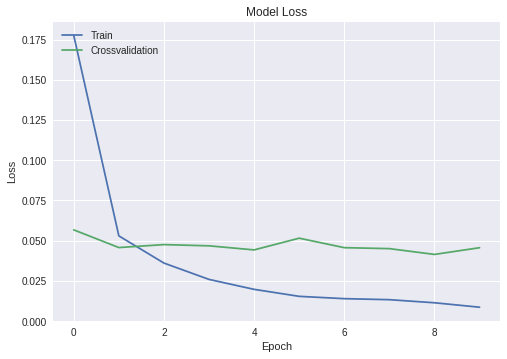

In [92]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Crossvalidation'], loc='upper left')
plt.show()

## **FIRST IMPLEMENTATION**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Activation, Flatten, BatchNormalization
from keras.datasets import mnist
import keras.backend as K

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.3)

In [0]:
batch_size = 128
epochs = 12
num_classes = 10
img_rows = 28
img_cols = 28

In [0]:
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  x_cv = x_cv.reshape(x_cv.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  x_cv = x_cv.reshape(x_cv.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_cv = x_cv.astype('float32')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_cv = keras.utils.to_categorical(y_cv, num_classes)

In [0]:
x_train = x_train/255
x_test = x_test/255
x_cv = x_cv/255

In [0]:
model = Sequential()
model.add(Conv2D(80, kernel_size=(2,2), strides=(1,1), padding='same'))
model.add(Conv2D(140, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(Conv2D(220, kernel_size=(3,3), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(90, kernel_size=(2,2), strides=(1,1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

In [111]:
model.fit(x = x_train, y = y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_cv, y_cv))

Train on 42000 samples, validate on 18000 samples
Epoch 1/12
42000/42000 [==============================] - 36s 866us/step - loss: 0.2341 - acc: 0.9290 - val_loss: 0.1091 - val_acc: 0.9674
Epoch 2/12
42000/42000 [==============================] - 35s 826us/step - loss: 0.0812 - acc: 0.9752 - val_loss: 0.0786 - val_acc: 0.9783
Epoch 3/12
42000/42000 [==============================] - 34s 818us/step - loss: 0.0672 - acc: 0.9795 - val_loss: 0.0856 - val_acc: 0.9753
Epoch 4/12
42000/42000 [==============================] - 35s 823us/step - loss: 0.0656 - acc: 0.9805 - val_loss: 0.0682 - val_acc: 0.9802
Epoch 5/12
42000/42000 [==============================] - 35s 824us/step - loss: 0.0465 - acc: 0.9854 - val_loss: 0.0681 - val_acc: 0.9805
Epoch 6/12
42000/42000 [==============================] - 34s 821us/step - loss: 0.0398 - acc: 0.9870 - val_loss: 0.0678 - val_acc: 0.9822
Epoch 7/12
42000/42000 [==============================] - 35s 825us/step - loss: 0.0335 - acc: 0.9900 - val_loss: 0.

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 80)        400       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 140)       100940    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 140)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 220)       277420    
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 220)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 90)        79290     
_________________________________________________________________
flatten_3 (Flatten)          (None, 12960)             0         
__________

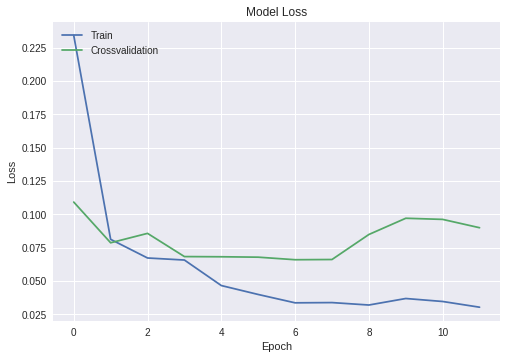

In [113]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Crossvalidation'], loc='upper left')
plt.show()

In [0]:
import numpy as np

In [0]:
x_test.shape

(10000, 28, 28, 1)

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08361372225491495
Test accuracy: 0.9839


## SECOND IMPLEMENTATION

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Activation, Flatten, BatchNormalization
from keras.datasets import mnist
import keras.backend as K

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
batch_size = 12
img_rows, img_cols = 28, 28
epochs, num_classes = 10, 10

In [0]:
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_train.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Conv2D(48, kernel_size=(4,4), strides=(1,1), padding='same'))
model.add(Conv2D(96, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(2,2), strides=(1,1), activation='relu'))
model.add(Conv2D(128, kernel_size=(2,2), strides=(2,2)))
model.add(Conv2D(48, kernel_size=(1,1), strides=(1,1)))
model.add(Flatten())
model.add(Dense(24, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [116]:
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=10, validation_data=(x_cv, y_cv))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 15s 358us/step - loss: 0.1830 - acc: 0.9426 - val_loss: 0.0793 - val_acc: 0.9760
Epoch 2/10
42000/42000 [==============================] - 14s 324us/step - loss: 0.0639 - acc: 0.9814 - val_loss: 0.0638 - val_acc: 0.9817
Epoch 3/10
42000/42000 [==============================] - 14s 328us/step - loss: 0.0444 - acc: 0.9859 - val_loss: 0.0585 - val_acc: 0.9832
Epoch 4/10
42000/42000 [==============================] - 14s 330us/step - loss: 0.0399 - acc: 0.9872 - val_loss: 0.0613 - val_acc: 0.9823
Epoch 5/10
42000/42000 [==============================] - 14s 326us/step - loss: 0.0374 - acc: 0.9883 - val_loss: 0.0597 - val_acc: 0.9832
Epoch 6/10
42000/42000 [==============================] - 14s 326us/step - loss: 0.0245 - acc: 0.9921 - val_loss: 0.0702 - val_acc: 0.9817
Epoch 7/10
42000/42000 [==============================] - 14s 331us/step - loss: 0.0235 - acc: 0.9926 - val_loss: 0.

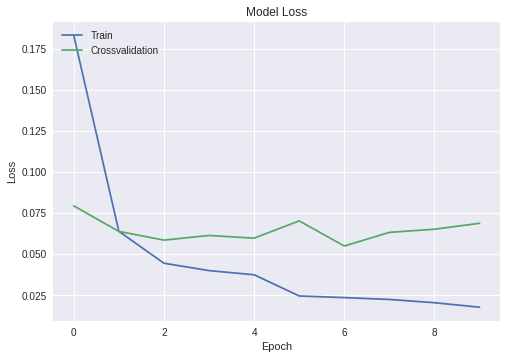

In [117]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Crossvalidation'], loc='upper left')
plt.show()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 28, 28, 48)        816       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 28, 28, 96)        18528     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 9, 9, 96)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 9, 9, 96)          384       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 8, 8, 96)          36960     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 4, 4, 128)         49280     
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 4, 4, 48)          6192      
__________

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2946061084747313
Test accuracy: 0.0824


## Third implementation

In [0]:
model = Sequential()
model.add(Conv2D(82, kernel_size=(2,2), padding='same'))
model.add(Conv2D(120, kernel_size=(2,2), activation='relu'))
model.add(Conv2D(62, kernel_size=(2,2), padding='same'))
model.add(Conv2D(122, kernel_size=(2,2), strides=(2,2), padding='same'))
model.add(Conv2D(42, kernel_size=(4,4), activation='relu'))

model.add(Flatten())
model.add(Dense(66, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(26, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

In [121]:
model.fit(x_train, y_train, batch_size=20, epochs=10, validation_data=(x_cv, y_cv))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 58s 1ms/step - loss: 0.2030 - acc: 0.9401 - val_loss: 0.0775 - val_acc: 0.9781
Epoch 2/10
42000/42000 [==============================] - 56s 1ms/step - loss: 0.0856 - acc: 0.9756 - val_loss: 0.0806 - val_acc: 0.9798
Epoch 3/10
42000/42000 [==============================] - 56s 1ms/step - loss: 0.0675 - acc: 0.9795 - val_loss: 0.0603 - val_acc: 0.9842
Epoch 4/10
42000/42000 [==============================] - 56s 1ms/step - loss: 0.0513 - acc: 0.9849 - val_loss: 0.0506 - val_acc: 0.9854
Epoch 5/10
42000/42000 [==============================] - 56s 1ms/step - loss: 0.0487 - acc: 0.9859 - val_loss: 0.0599 - val_acc: 0.9856
Epoch 6/10
42000/42000 [==============================] - 56s 1ms/step - loss: 0.0324 - acc: 0.9897 - val_loss: 0.0781 - val_acc: 0.9813
Epoch 7/10
42000/42000 [==============================] - 57s 1ms/step - loss: 0.0367 - acc: 0.9895 - val_loss: 0.1720 - val_acc

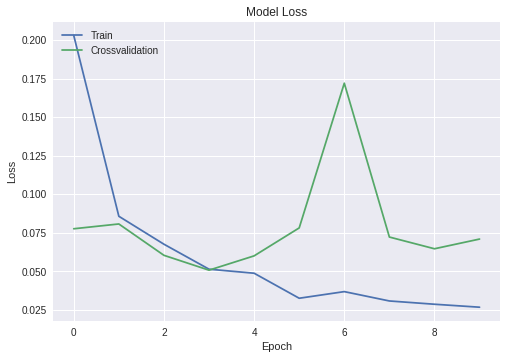

In [122]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Crossvalidation'], loc='upper left')
plt.show()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 82)        410       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 27, 27, 120)       39480     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 27, 27, 62)        29822     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 122)       30378     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 42)        82026     
_________________________________________________________________
flatten_5 (Flatten)          (None, 5082)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 66)                335478    
__________

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05432184503394819
Test accuracy: 0.9873


# Conclusion

In [0]:
from prettytable import PrettyTable

In [0]:
x = PrettyTable()

In [0]:
x.field_names = (['Architecture','test loss','test accuracy'])

In [0]:
x.add_row(['CONV-CONV-POOL-CONV-DROPOUT-CONV', '0.08', '98.39'])
x.add_row(['CONV-CONV-POOL-BATCHNORM-CONV-CONV-CONV','2.29','8.24'])
x.add_row(['CONV-CONV-CONV-CONV-CONV','0.054','98.73'])


In [0]:
print(x)

+-----------------------------------------+-----------+---------------+
|               Architecture              | test loss | test accuracy |
+-----------------------------------------+-----------+---------------+
|     CONV-CONV-POOL-CONV-DROPOUT-CONV    |    0.08   |     98.39     |
| CONV-CONV-POOL-BATCHNORM-CONV-CONV-CONV |    2.29   |      8.24     |
|         CONV-CONV-CONV-CONV-CONV        |   0.054   |     98.73     |
+-----------------------------------------+-----------+---------------+
